# Lab: Course 4, Module 4

### Step 0

Imagine you're a data scientist at a healthcare startup tasked with analyzing patient data to improve breast cancer diagnosis. Importing the necessary libraries and setting up a Spark session ensures you have the computational tools to handle large-scale data, just like a doctor gathers essential instruments before starting a procedure.

**Import the germane library**

In [1]:
# CodeGrade step0
from pyspark.sql import SparkSession
from pyspark.sql.functions import min, max
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("Breast Cancer Analysis") \
    .getOrCreate()

### Step 1

Hospitals rely on efficient systems to process and analyze patient records. By verifying the Spark session, you're ensuring the system is operational and ready to handle critical tasks, much like checking that medical equipment is functioning before use.

**Create a Spark session where the name is "Breast Cancer Analysis" and verify that it is running such that if it is, the reponse is `yes`.**

In [2]:
# CodeGrade step1
if (spark.getActiveSession()):
    print('yes')
else:
    print('no')

yes


### Step 2

In real-world scenarios, data scientists often collaborate with clinicians to answer specific queries, such as reviewing key patient metrics. Here, you're tasked with loading the dataset and pinpointing specific details (e.g., the perimeter mean of the 77th row), mirroring how teams use data to address targeted medical questions.

*   **Load the data**
*   **Display records and data types**
*   **Find the permimter mean of the 77th row**
  * **Call this `permiter_mean_value`**




In [3]:
# CodeGrade step0

# Load the data
df = spark.read.csv("breast_cancer.csv", header=True, inferSchema=True)


In [4]:
# Run this code

# Display records and data types
df.show(5)
df.printSchema()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----+
|      id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|_c32|
+--------+---------+-----------+------

In [5]:
# CodeGrade step2
row_77 = df.take(77)[76]
row_77

Row(id=8610629, diagnosis='B', radius_mean=13.53, texture_mean=10.94, perimeter_mean=87.91, area_mean=559.2, smoothness_mean=0.1291, compactness_mean=0.1047, concavity_mean=0.06877, concave points_mean=0.06556, symmetry_mean=0.2403, fractal_dimension_mean=0.06641, radius_se=0.4101, texture_se=1.014, perimeter_se=2.652, area_se=32.65, smoothness_se=0.0134, compactness_se=0.02839, concavity_se=0.01162, concave points_se=0.008239, symmetry_se=0.02572, fractal_dimension_se=0.006164, radius_worst=14.08, texture_worst=12.49, perimeter_worst=91.36, area_worst=605.5, smoothness_worst=0.1451, compactness_worst=0.1379, concavity_worst=0.08539, concave points_worst=0.07407, symmetry_worst=0.271, fractal_dimension_worst=0.07191, _c32=None)

In [6]:
perimeter_mean_value = row_77['perimeter_mean']
perimeter_mean_value

87.91

### Steps 3 & 4

To design effective diagnostic tools, understanding the dataset’s summary statistics is vital. This step emulates how medical professionals analyze patterns in patient data to gain insights into critical health indicators, such as tumor size or perimeter mean.


**Step 3: Find the counts of the number of Benight and Malignant diagnosis, and then take the difference of the two (B - M).**

Oncologists might want to examine specific groups of patients to identify patterns or anomalies. Filtering the data simulates this process, helping uncover insights like identifying patients with high-risk profiles based on specific attributes.

**Step 4: Do this as a SQL query**
  * **  *Hint*: Use `df.createOrReplaceTempView()` to be able to find these counts using SQL **



In [7]:
# CodeGrade step3
b_count = df.filter(df.diagnosis == 'B').count()
b_count

357

In [8]:
m_count = df.filter(df.diagnosis == 'M').count()
m_count

212

In [9]:
diagnosis_diff = b_count - m_count
diagnosis_diff

145

In [10]:
# CodeGrade step4
df.createOrReplaceTempView("cancer_data")

In [11]:
sql_counts = spark.sql("""
    SELECT 
        diagnosis, 
        COUNT(*) AS count 
    FROM cancer_data 
    GROUP BY diagnosis
""")

sql_counts.show()

+---------+-----+
|diagnosis|count|
+---------+-----+
|        B|  357|
|        M|  212|
+---------+-----+



### Step 5

You're part of a public health team working to understand the prevalence of different types of breast cancer diagnoses in a population. To gain insights, you’re tasked with visualizing the distribution of benign (B) and malignant (M) cases. This plot will help illustrate the balance between the two diagnosis classes, aiding stakeholders in understanding the overall dataset composition.

For example, a significant imbalance might indicate a need for better early detection programs to catch malignant cases earlier, or it might reflect the population's overall health profile. By labeling the chart as "Diagnosis Class Balance," you’re creating a clear and intuitive visualization that can be presented to medical professionals and policymakers to inform decisions on resource allocation or research focus areas.


**Create a bar plot to show the distribution of benign and malignant cases.**
* ***Hint*: It will be useful to convert back to pandas so you can use `matplotlib` and `pandas` visualization tools.**
* The code to create the plots is included, using a SQL query in conjunction with pyspark, create a dataframe “diagnosis_counts” that contains the appropriate information to plot.
* Label the Count columns as “count”


In [12]:
# CodeGrade step5
df.createOrReplaceTempView("cancer_data")

In [14]:
diagnosis_counts = spark.sql("""
    SELECT 
        diagnosis, 
        COUNT(*) AS count
    FROM cancer_data
    GROUP BY diagnosis
""")

In [16]:
diagnosis_counts_pd = diagnosis_counts.toPandas()

In [18]:
import matplotlib.pyplot as plt

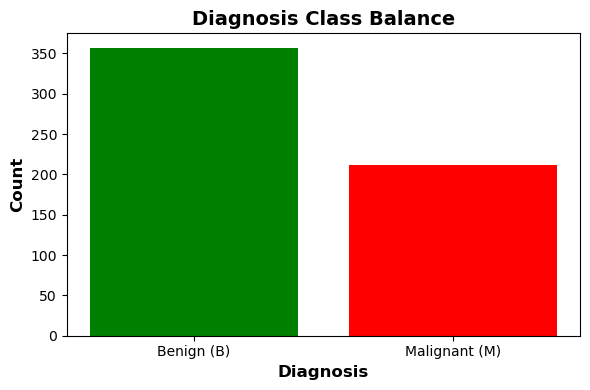

In [20]:
# Run this code

plt.figure(figsize=(6, 4))
plt.bar(diagnosis_counts_pd['diagnosis'], diagnosis_counts_pd['count'], color=['green', 'red'])

plt.title("Diagnosis Class Balance", fontsize=14, weight='bold')
plt.xlabel("Diagnosis", fontsize=12, weight='bold')
plt.ylabel("Count", fontsize=12, weight='bold')
plt.xticks(ticks=[0, 1], labels=['Benign (B)', 'Malignant (M)'])
plt.tight_layout()
plt.show()

### Step 6

Hospitals often look for trends, such as average tumor sizes, across different patient groups. Aggregating the data allows you to provide actionable insights, just as hospital administrators use statistics to guide resource allocation and policy decisions.

**Use .describe() to see statistics for each feature, which will help you understand the ranges and distributions of the data.**

**Then use the 'pyspark.sql.functions' of 'min' and 'max' to find the**
* **maximum of the `compactness_mean`**
* **minimum of the `smoothness_mean`**

**Take the difference of the `max_compactness_mean` and `min_snmoothness_mean`.**

In [21]:
# Run this code

# Summary statistics
df.describe().show()

+-------+--------------------+---------+------------------+-----------------+-----------------+-----------------+--------------------+-------------------+-------------------+--------------------+--------------------+----------------------+------------------+------------------+------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+------------------+-----------------+--------------------+-------------------+-------------------+--------------------+-------------------+-----------------------+----+
|summary|                  id|diagnosis|       radius_mean|     texture_mean|   perimeter_mean|        area_mean|     smoothness_mean|   compactness_mean|     concavity_mean| concave points_mean|       symmetry_mean|fractal_dimension_mean|         radius_se|        texture_se|      perimeter_se|          area_se|       smoothness_se|      compactness_

In [22]:
#CodeGrade step6
agg_result = df.select(max("compactness_mean").alias("max_compactness_mean"),min("smoothness_mean").alias("min_smoothness_mean")).collect()[0]

In [24]:
max_compactness_mean = agg_result["max_compactness_mean"]
min_smoothness_mean = agg_result["min_smoothness_mean"]
difference = max_compactness_mean - min_smoothness_mean

In [25]:
max_compactness_mean

0.3454

In [26]:
min_smoothness_mean

0.05263

In [27]:
difference

0.29277

### Step 7

Identifying and creating meaningful features is akin to a doctor refining diagnostic criteria. By engineering new features, you're preparing the data for predictive models, making the analysis more precise and impactful.


**Let's suppose that you have reason to believe that the product of the 'radius_mean', 'texture_mean', and 'perimeter_mean' is meaningful to verify a diagnosis of Benign.**

**Thus, use SQL Query to compute:**
*   **Average of 'radius_mean', 'texture_mean', and 'perimeter_mean' for each diagnosis (all three rounded to two decimal places) only for the Benign case**
*  ** Return only the product of the these three rounded means**

In [28]:
#CodeGrade step07
df.createOrReplaceTempView("cancer_data")

In [29]:
benign_means = spark.sql("""
    SELECT 
        ROUND(AVG(radius_mean), 2) AS radius_mean_b,
        ROUND(AVG(texture_mean), 2) AS texture_mean_b,
        ROUND(AVG(perimeter_mean), 2) AS perimeter_mean_b
    FROM cancer_data
    WHERE diagnosis = 'B'
""").collect()[0]

In [30]:
radius_mean_b = benign_means["radius_mean_b"]
texture_mean_b = benign_means["texture_mean_b"]
perimeter_mean_b = benign_means["perimeter_mean_b"]

In [31]:
product_b = round(radius_mean_b * texture_mean_b * perimeter_mean_b, 2)
product_b

16990.72

### Step 8

Let's suppose that you have reason to believe that the average of the ratio of the `radius_mean` and the `perimeter_mean` are meaningful for the Malignant cases.

**Thus, use SQL Query to compute:**

*   **Average of the ration of the `radius_mean` and the `perimeter_mean` only for the Malignant cases**
*   **Round this to two decimal places and call the result `mean_radius_perimeter_ratio`**


In [32]:
# CodeGrade step8
df.createOrReplaceTempView("cancer_data")

In [33]:
mean_ratio_result = spark.sql("""
    SELECT 
        ROUND(AVG(radius_mean / perimeter_mean), 2) AS mean_radius_perimeter_ratio
    FROM cancer_data
    WHERE diagnosis = 'M'
""").collect()[0]

In [34]:
mean_radius_perimeter_ratio = mean_ratio_result["mean_radius_perimeter_ratio"]
mean_radius_perimeter_ratio

0.15

### Step 9

 Before deploying a diagnostic model, it’s crucial to ensure its reliability by looking at its sum of standard devations.

** Use a query to find `sum_of_stddevs`, where that is the sum of the standard deviation of the `symmetry_mean` and `fractal_dimension_mean',**

In [35]:
# CodeGrade step9
df.createOrReplaceTempView("cancer_data")

In [36]:
stddev_result = spark.sql("""
    SELECT 
        STDDEV(symmetry_mean) AS stddev_symmetry,
        STDDEV(fractal_dimension_mean) AS stddev_fractal
    FROM cancer_data
""").collect()[0]

In [37]:
stddev_symmetry = stddev_result["stddev_symmetry"]
stddev_fractal = stddev_result["stddev_fractal"]

In [38]:
sum_of_stddevs = stddev_symmetry + stddev_fractal
sum_of_stddevs

0.03447464413112017

### Step 10

Close the spark session, where verification will result in the output of 'yes'



In [39]:
# CodeGrade step10
spark.stop()

In [40]:
if not SparkSession.getActiveSession():
    print('yes')
else:
    print('no')

yes
